<a href="https://colab.research.google.com/github/satishnaik4567/SFDCS-main/blob/main/Spinach-code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [3]:
class_names = ['ANTHRACNOSE', 'DOWNEYMILDEW', 'GOODLEAF', 'LEAFMINER', 'SLUGINFECTED']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
#datasets = ['/SPINACH/TRAIN', '/SPINACH/VALID']

In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = ['SPINACH/TRAIN', 'SPINACH/VALID']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|                                                                                           | 0/31 [00:00<?, ?it/s]

Loading SPINACH/TRAIN


  0%|                                                                                           | 0/21 [00:00<?, ?it/s]

Loading SPINACH/VALID


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:03<00:00,  5.45it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

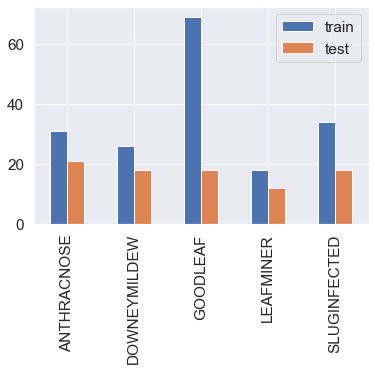

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

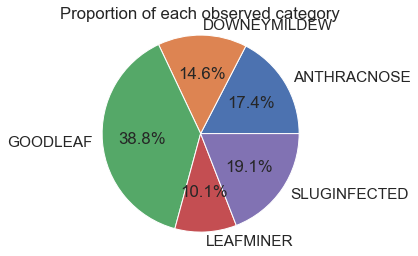

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

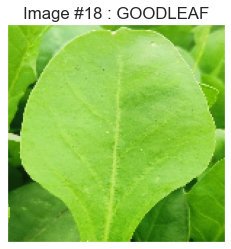

In [ ]:
display_random_image(class_names, train_images, train_labels)

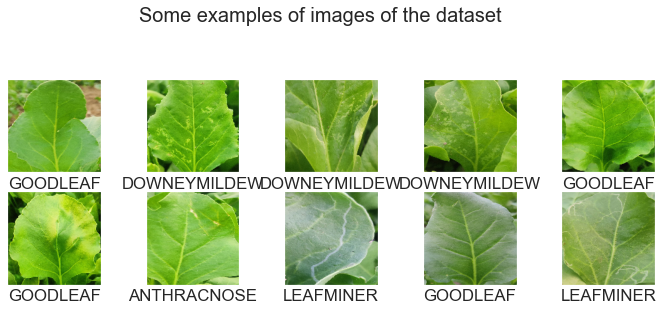

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(12,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=20)
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_examples(class_names, train_images, train_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [ ]:
test_images.shape

(87, 150, 150, 3)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
6/6 [==============================] - 19s 1s/step - loss: 2.1696 - accuracy: 0.2135 - val_loss: 1.6136 - val_accuracy: 0.3333
Epoch 2/15
6/6 [==============================] - 5s 928ms/step - loss: 1.5293 - accuracy: 0.3427 - val_loss: 1.7362 - val_accuracy: 0.2069
Epoch 3/15
6/6 [==============================] - 5s 918ms/step - loss: 1.4657 - accuracy: 0.4045 - val_loss: 1.4899 - val_accuracy: 0.3103
Epoch 4/15
6/6 [==============================] - 6s 961ms/step - loss: 1.3561 - accuracy: 0.4270 - val_loss: 1.3710 - val_accuracy: 0.4253
Epoch 5/15
6/6 [==============================] - 6s 956ms/step - loss: 1.2430 - accuracy: 0.4775 - val_loss: 1.3817 - val_accuracy: 0.4138
Epoch 6/15
6/6 [==============================] - 6s 973ms/step - loss: 1.1768 - accuracy: 0.5225 - val_loss: 1.2093 - val_accuracy: 0.3908
Epoch 7/15
6/6 [==============================] - 6s 959ms/step - loss: 0.9856 - accuracy: 0.6292 - val_loss: 0.9574 - val_accuracy: 0.5402
Epoch 8/15
6/6 [======

3/3 - 1s - loss: 0.0932 - accuracy: 0.9770


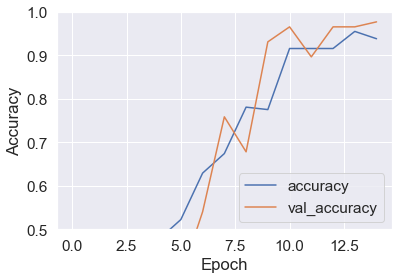

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [ ]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.977011501789093


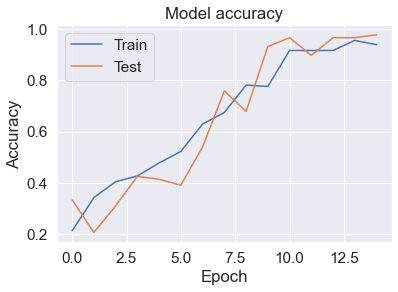

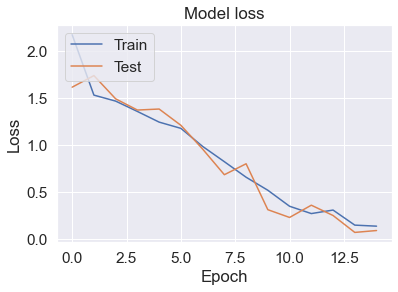

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [ ]:
'''from keras.preprocessing.image import ImageDataGenerator
General_datagen = ImageDataGenerator(rescale=1./255, )
test_data = General_datagen.flow_from_directory('SPINACH/TEST/', target_size=(150,150),)
print(test_data)
print('data groups:', len(test_data))

'''

"from keras.preprocessing.image import ImageDataGenerator\nGeneral_datagen = ImageDataGenerator(rescale=1./255, )\ntest_data = General_datagen.flow_from_directory('SPINACH/TEST/', target_size=(150,150),)\nprint(test_data)\nprint('data groups:', len(test_data))\n\n"

In [ ]:
def tst_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = ['SPINACH/VALID','SPINACH/TEST']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [ ]:
(dummy_DATA, dummydata_LBS),(test_data, testdata_labels) = tst_data()

  0%|                                                                                           | 0/21 [00:00<?, ?it/s]

Loading SPINACH/VALID


 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  8.33it/s]

Loading SPINACH/TEST


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.28it/s]


In [ ]:
test_data=test_data/255

In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(test_data)
pred_label = np.argmax(prediction, axis = 1)
pred_label

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], dtype=int64)

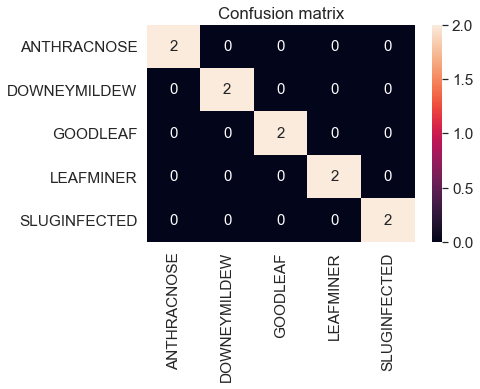

In [ ]:
CM = confusion_matrix(testdata_labels, pred_label)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 15},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:

predictions = model.predict(test_data)     # Vector of probabilities
predictions

array([[10.031118  , -0.24197297, -0.77242506,  0.7865667 ,  0.8115219 ],
       [ 8.948462  ,  0.3266204 ,  0.39631638,  0.19870332,  0.19139539],
       [-1.1623265 , 11.468805  ,  5.5355105 , -1.265833  , -0.96567535],
       [ 3.7091656 ,  6.106829  ,  1.8665315 ,  0.14530537, -0.77820617],
       [ 0.39485034, -0.61260325, 11.627359  , -4.0748053 ,  3.8898828 ],
       [-5.8786545 ,  3.041108  , 16.315636  , -5.342227  ,  1.7156903 ],
       [ 3.8310668 ,  3.2322664 , -1.0017265 ,  5.2437167 ,  2.4740243 ],
       [ 7.657278  ,  2.5863185 , -2.847198  , 10.854206  ,  4.7130795 ],
       [ 7.0460606 ,  0.31786945,  2.89327   , -0.23226354,  8.622884  ],
       [ 5.4857616 ,  5.4870872 ,  2.7835097 , -0.84467345,  7.697046  ]],
      dtype=float32)

In [ ]:
pred_labels = np.argmax(predictions, axis = 1)
pred_labels


array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(pred_labels,testdata_labels)
print(classification_report(pred_labels,testdata_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



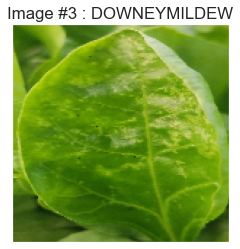

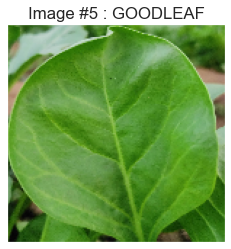

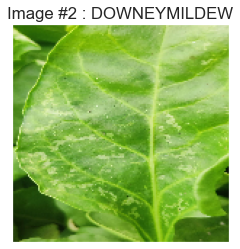

In [ ]:
predictions = model.predict(test_data)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

for i in range(3):
    display_random_image(class_names, test_data, pred_labels)


In [ ]:
#### https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/
### https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras
### https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras